In [ ]:
from google.colab import drive
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
!apt install gdal-bin python-gdal python3-gdal 
from PIL import Image as im
from osgeo import gdal
import matplotlib.pyplot as plt


Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 3s (703 kB/s)
Selecting previously unselected package python3-numpy.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../python3-numpy_1%

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MinorProject/CurrentDataset.csv")


FileNotFoundError: ignored

In [ ]:
#ignore the mean ndvis and evis in this one

df = df.dropna()
print(df)

NameError: ignored

In [ ]:
data = df

In [ ]:
image = gdal.Open('/content/MyDrive/MyDrive/2000March_MOD_Grid_monthly_1km_VI.tif')


In [ ]:
#NDVI CALCULATION 

imagearray = image.ReadAsArray()
imagearray = imagearray * 0.0001

imagearray[imagearray==-0.3]=np.nan

imagearray

z = np.nanmean(imagearray)
z

0.25282165614495233

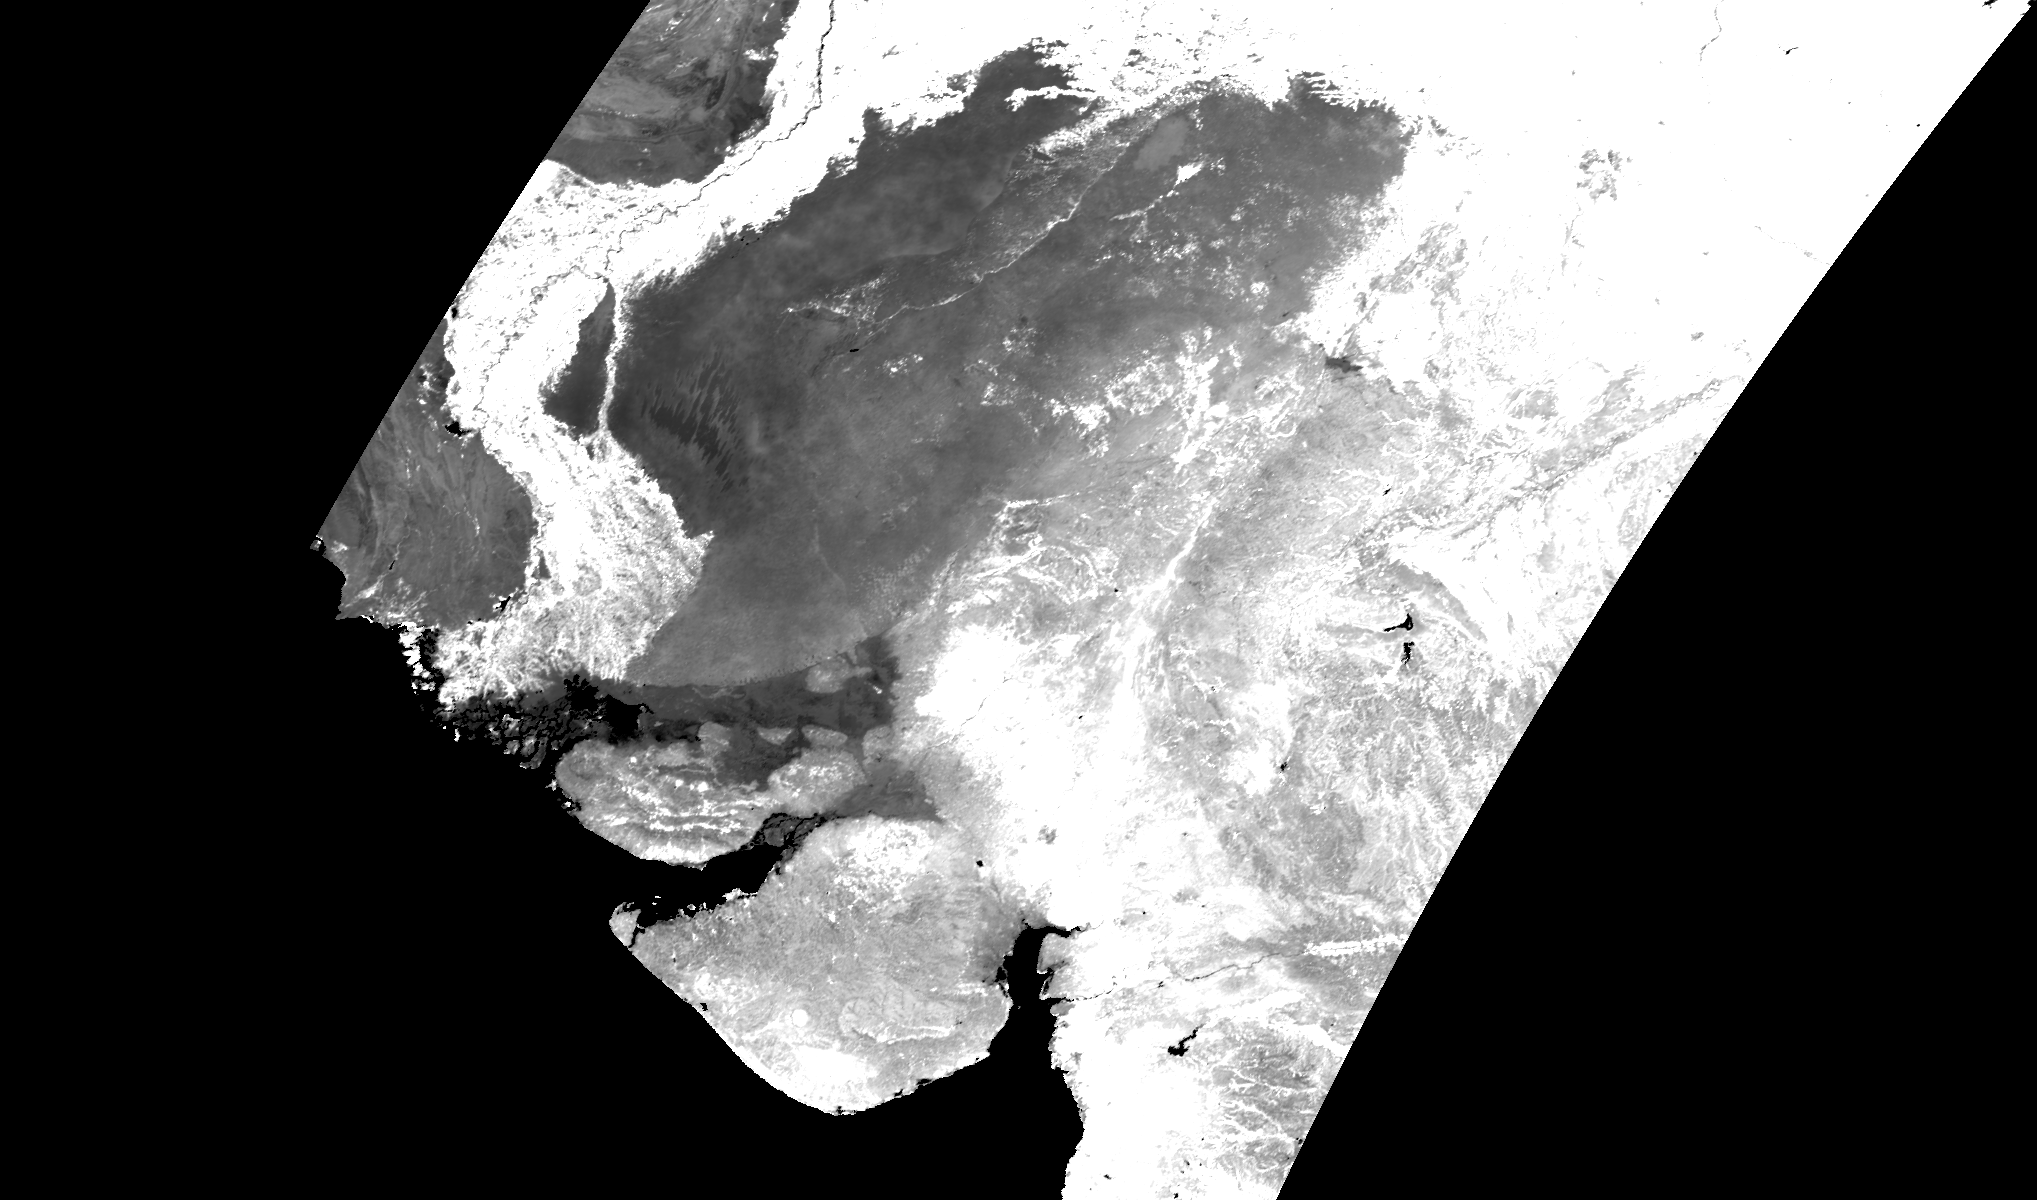

In [ ]:
#NDVI IMAGE

imagearray=imagearray*1000
#imagearray[imagearray==np.nan]=0

new_p = Image.fromarray(imagearray)
if new_p.mode != 'RGB':
    new_p = new_p.convert('RGB')
new_p




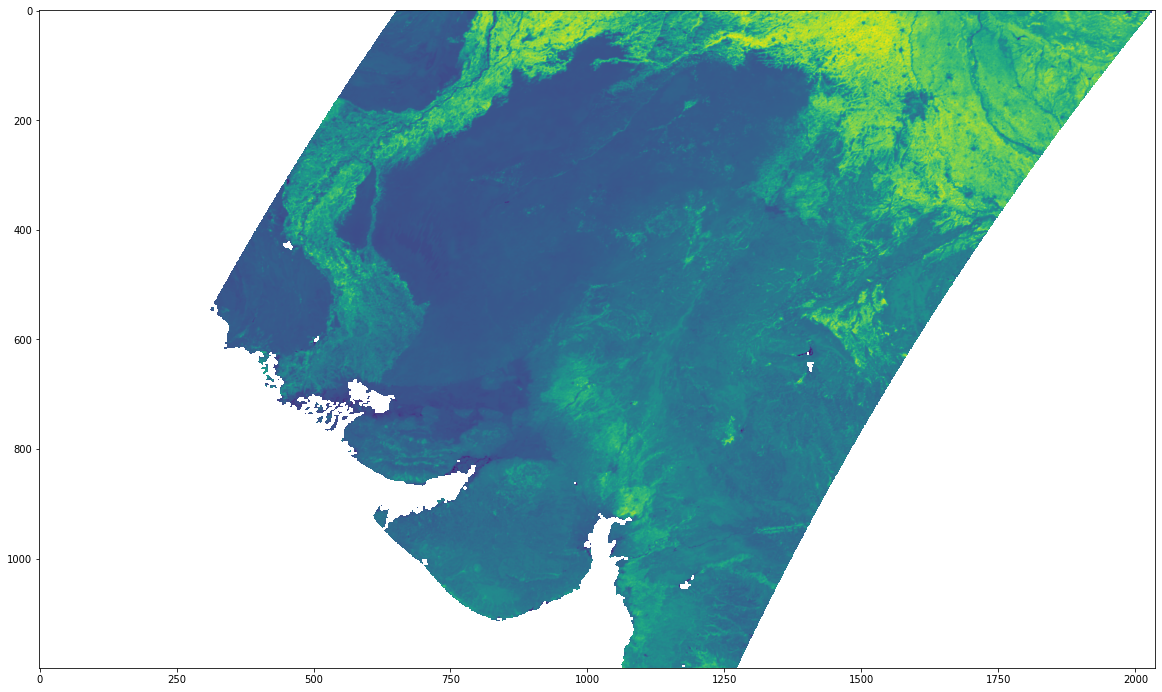

In [ ]:
#heatmap

image = imagearray
plt.figure(figsize=(20,20))
plt.imshow(image, cmap='viridis')

In [ ]:
#EVI CALCULATION
image2 = gdal.Open('/content/MyDrive/MyDrive/2000March_MOD_Grid_monthly_1km_VI.tif')
imagearray2 = image2.ReadAsArray()
imagearray2=imagearray2*0.0001

imagearray2[imagearray2==-0.3]=np.nan

imagearray2

x = np.nanmean(imagearray2)
x

0.25282165614495233

# PROCESSING DATA


USING THE DATA IN THE DRIVE

In [ ]:
drive.mount('/content/MyDrive')


Mounted at /content/MyDrive


In [ ]:
import os
import pathlib

In [ ]:
#Setting up directory for the data
data_dir = os.fsdecode('/content/MyDrive/MyDrive/LAI')

In [ ]:
image_arr = gdal.Open(os.path.join(data_dir, os.fsdecode('MOD13A3.006__1_km_monthly_NDVI_doy2000275_aid0001.tif'))).ReadAsArray()
image_arr = image_arr * 0.0001
image_arr[image_arr == -0.3] = np.nan

ndvi_val = np.nanmean(image_arr)
print('NDVI Val for this image should be: ', ndvi_val)

NDVI Val for this image should be:  0.25309240834938157


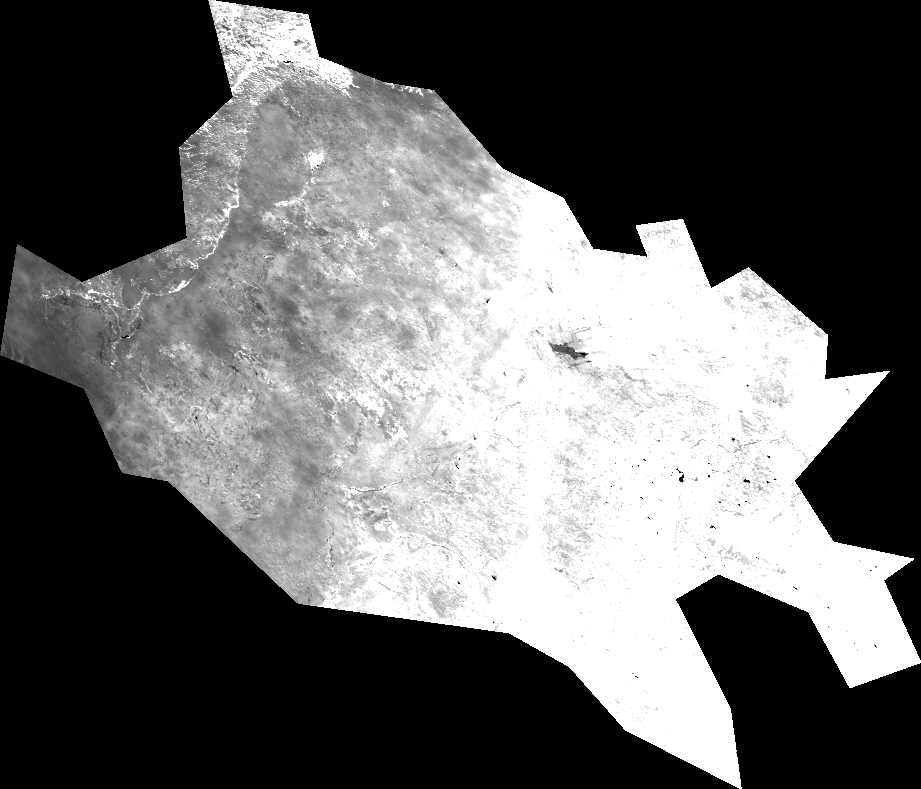

In [ ]:
image_arr=image_arr*1000
#imagearray[imagearray==np.nan]=0

new_p = Image.fromarray(image_arr)
if new_p.mode != 'RGB':
    new_p = new_p.convert('RGB')
new_p

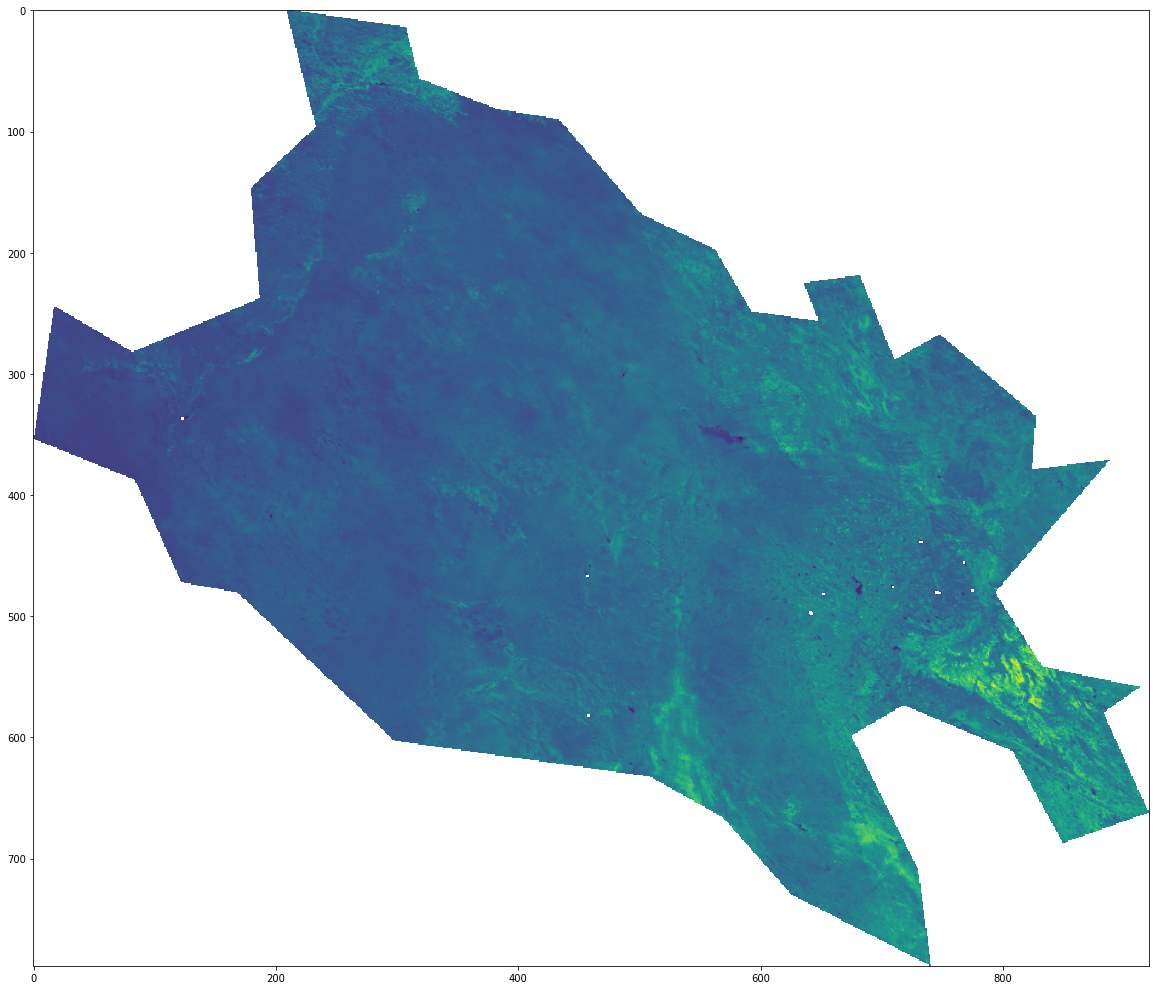

In [ ]:
#heatmap

image = image_arr
plt.figure(figsize=(20,20))
plt.imshow(image, cmap='viridis')


In [ ]:
import cv2

In [ ]:
image_arr = gdal.Open(os.path.join(data_dir, os.fsdecode('MYD15A2H.006_Lai_500m_doy2002273_aid0001.tif'))).ReadAsArray()
image_arr = image_arr * 0.1
image_arr[image_arr == 24.9] = np.nan
image_arr[image_arr == 25.0] = np.nan
image_arr[image_arr == 25.1] = np.nan
image_arr[image_arr == 25.2] = np.nan
image_arr[image_arr == 25.3] = np.nan
image_arr[image_arr == 25.4] = np.nan
image_arr[image_arr == 25.5] = np.nan

lai_val = np.nanmean(image_arr)
print('LAI Val for this image should be: ', lai_val)

LAI Val for this image should be:  0.4201061263196063


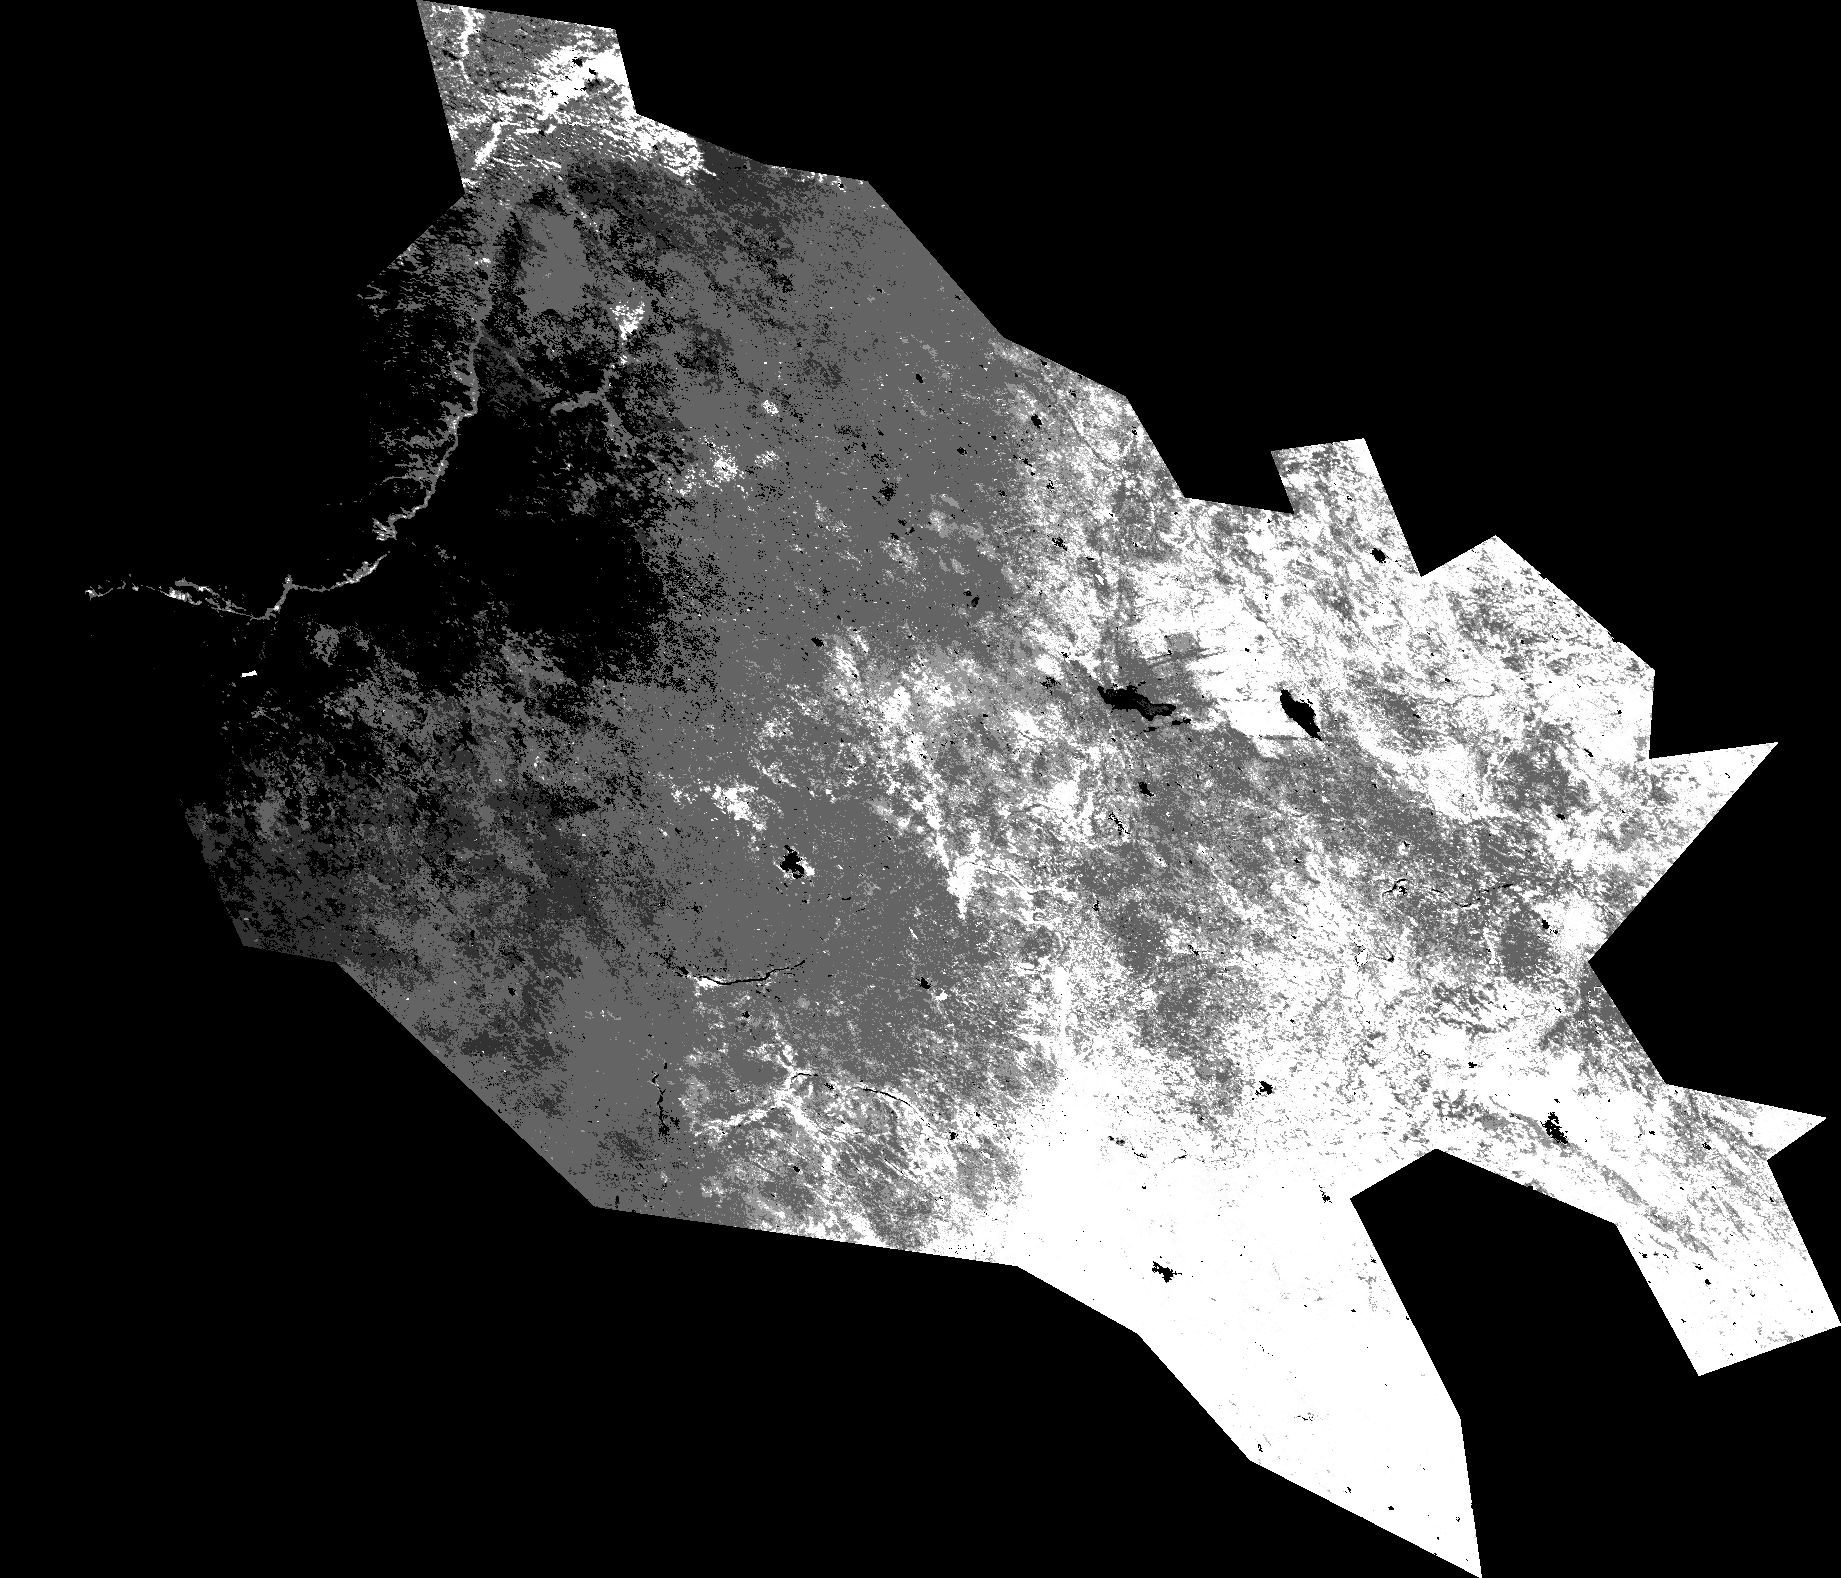

In [ ]:
image_arr=image_arr*500
#imagearray[imagearray==np.nan]=0

new_p = Image.fromarray(image_arr)
if new_p.mode != 'RGB':
    new_p = new_p.convert('RGB')
new_p

In [ ]:
equ = cv2.equalizeHist(new_p)
res = np.hstack((new_p, equ))

TypeError: ignored

In [ ]:
cv2.imshow(\'image\', res)

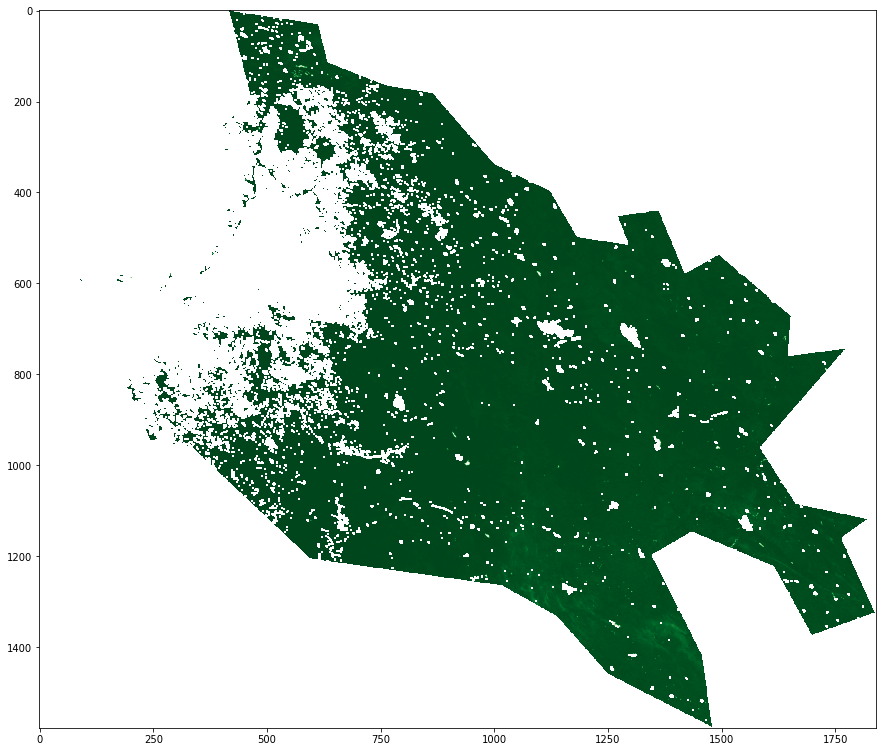

In [ ]:
#heatmap

image = image_arr
plt.figure(figsize=(15,15))
plt.imshow(image, cmap='Greens_r')


In [ ]:
files = []

p = pathlib('/content/MyDrive/MyDrive/MODIS_DATA')

for item in p.glob('**/**'):
  if item.suffix in ['.tif']:
    name=item.name
    files.append(File(name))

TypeError: ignored

In [ ]:
data_dir = os.fsdecode('/content/MyDrive/MyDrive/FPARR')

In [ ]:
image_arr = gdal.Open(os.path.join(data_dir, os.fsdecode('MYD15A2H.006_Lai_500m_doy2002273_aid0001.tif'))).ReadAsArray()
image_arr = image_arr*0.1
image_arr[image_arr == 24.9] = np.nan
image_arr[image_arr == 25.0] = np.nan
image_arr[image_arr == 25.1] = np.nan
image_arr[image_arr == 25.2] = np.nan
image_arr[image_arr == 25.3] = np.nan
image_arr[image_arr == 25.4] = np.nan
image_arr[image_arr == 25.5] = np.nan

ndvi_val = np.nanmean(image_arr)
print('EVI Val for this image should be: ', ndvi_val)
image_arr

EVI Val for this image should be:  0.4201061263196063


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


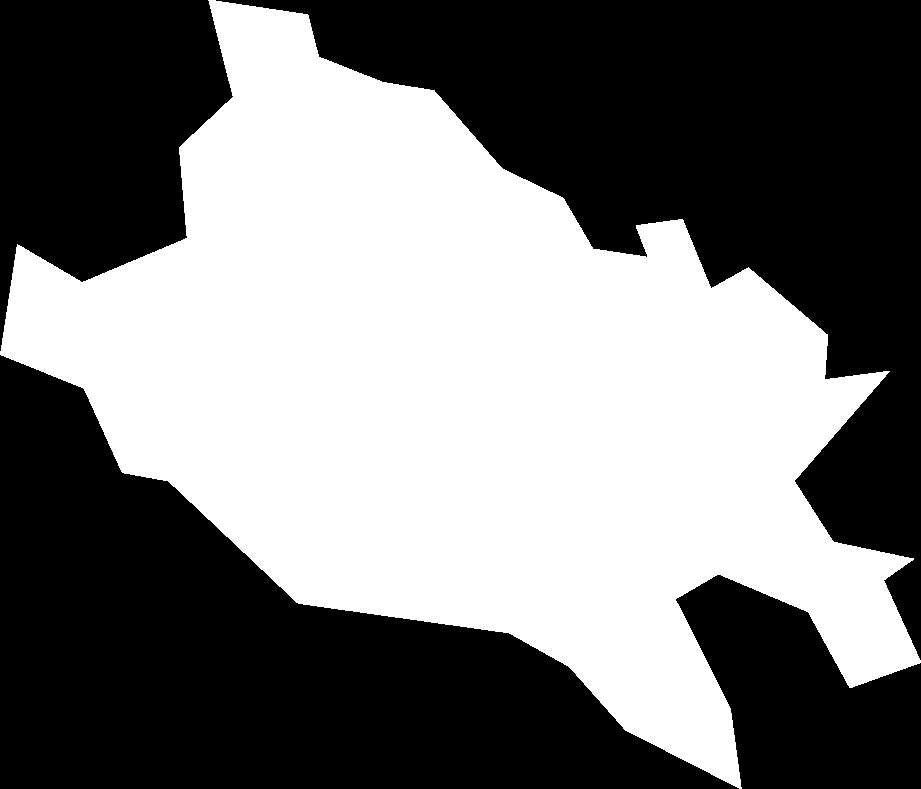

In [ ]:
image_arr = image_arr*10000000
#imagearray[imagearray==np.nan]=0
print(image_arr)
new_p = Image.fromarray(image_arr)
if new_p.mode != 'RGB':
    new_p = new_p.convert('RGB')
new_p

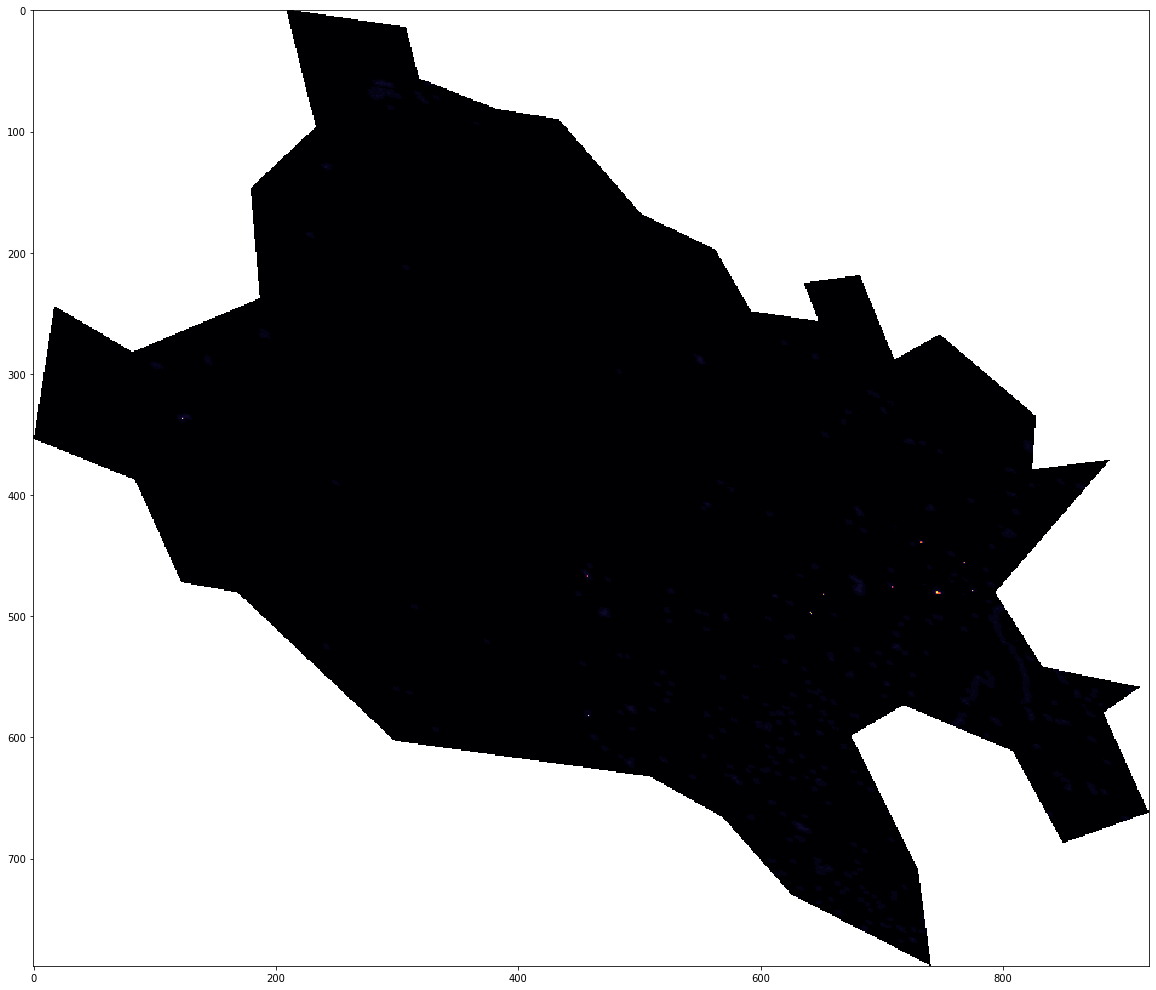

In [ ]:

image = image_arr
plt.figure(figsize=(20,20))
plt.imshow(image, cmap='inferno')

In [ ]:
N = 1000
i=0

data_MODIS = []*2
for filename in os.listdir(directory):
    
    if filename.endswith(".tif"):
        image_arr = gdal.Open(os.path.join(data_dir, os.fsdecode(filename))).ReadAsArray()
        image_arr = image_arr * 0.0001
        image_arr[image_arr == -0.3] = np.nan
        ndvi_val = np.nanmean(image_arr) 
        print(os.path.join(directory, filename))
        data_MODIS.append(filename)
        data_MODIS.append(ndvi_val)
        continue
        
    else:
        
        continue
        

NameError: ignored

In [ ]:
LAI_dir = os.fsdecode('/content/MyDrive/MyDrive/FPARR')

In [ ]:
N = 1000
i=0

data_MODIS = []*2
#data_MODIS = [[]*2]*1000
for filename in os.listdir(LAI_dir):
    
    if filename.endswith(".tif"):
        image_arr = gdal.Open(os.path.join(LAI_dir, os.fsdecode(filename))).ReadAsArray()
        image_arr = image_arr * 0.1
        image_arr[image_arr == 2.49] = np.nan
        image_arr[image_arr == 2.50] = np.nan
        image_arr[image_arr == 2.51] = np.nan
        image_arr[image_arr == 2.52] = np.nan
        image_arr[image_arr == 2.53] = np.nan
        image_arr[image_arr == 2.54] = np.nan
        image_arr[image_arr == 2.55] = np.nan
        ndvi_val = np.nanmean(image_arr)
        substr = filename[26:33] 
        print(os.path.join(LAI_dir, filename))
        data_MODIS.append(substr)
        data_MODIS.append(ndvi_val)
        continue
        
    else:
        
        continue
        

/content/MyDrive/MyDrive/FPARR/MYD15A2H.006_Fpar_500m_doy2002273_aid0001.tif
/content/MyDrive/MyDrive/FPARR/MYD15A2H.006_Fpar_500m_doy2002281_aid0001.tif
/content/MyDrive/MyDrive/FPARR/MYD15A2H.006_Fpar_500m_doy2002289_aid0001.tif
/content/MyDrive/MyDrive/FPARR/MYD15A2H.006_Fpar_500m_doy2002297_aid0001.tif
/content/MyDrive/MyDrive/FPARR/MYD15A2H.006_Fpar_500m_doy2002305_aid0001.tif
/content/MyDrive/MyDrive/FPARR/MYD15A2H.006_Fpar_500m_doy2002313_aid0001.tif
/content/MyDrive/MyDrive/FPARR/MYD15A2H.006_Fpar_500m_doy2002321_aid0001.tif
/content/MyDrive/MyDrive/FPARR/MYD15A2H.006_Fpar_500m_doy2002329_aid0001.tif
/content/MyDrive/MyDrive/FPARR/MYD15A2H.006_Fpar_500m_doy2002337_aid0001.tif
/content/MyDrive/MyDrive/FPARR/MYD15A2H.006_Fpar_500m_doy2002345_aid0001.tif
/content/MyDrive/MyDrive/FPARR/MYD15A2H.006_Fpar_500m_doy2002353_aid0001.tif
/content/MyDrive/MyDrive/FPARR/MYD15A2H.006_Fpar_500m_doy2002361_aid0001.tif
/content/MyDrive/MyDrive/FPARR/MYD15A2H.006_Fpar_500m_doy2003001_aid0001.tif

In [ ]:
data_MODIS

['2002273',
 1.6249767471080154,
 '2002281',
 1.6190247419883397,
 '2002289',
 1.6143221211580432,
 '2002297',
 1.6066787870043369,
 '2002305',
 1.6047997054944338,
 '2002313',
 1.6029490079421933,
 '2002321',
 1.6069531928759482,
 '2002329',
 1.6069095140968828,
 '2002337',
 1.6098315740204119,
 '2002345',
 1.6095947752531106,
 '2002353',
 1.6140956949789418,
 '2002361',
 1.616021013034253,
 '2003001',
 1.621305437686977,
 '2003009',
 1.6218383125783777,
 '2003017',
 1.6211634005382702,
 '2003025',
 1.6158469088824208,
 '2003033',
 1.6252801479017152,
 '2003041',
 1.6204270503293163,
 '2003049',
 1.6200565262909736,
 '2003057',
 1.6149434754349157,
 '2003065',
 1.61121708946901,
 '2003073',
 1.60334727390778,
 '2003081',
 1.5986011675978966,
 '2003089',
 1.5924272822886938,
 '2003097',
 1.5903198174424473,
 '2003105',
 1.5873166787421311,
 '2003113',
 1.5885745923710912,
 '2003121',
 1.5855447921495556,
 '2003273',
 1.6760414406472217,
 '2003281',
 1.6581413391995121,
 '2003289',
 1.6

In [ ]:
LAI_dataFrame = pd.DataFrame(data_MODIS, columns =['Year And Day'])
LAI_dataFrame

Year And Day
0         2002273
1         1.62498
2         2002281
3         1.61902
4         2002289
...           ...
1057      1.60059
1058      2021105
1059      1.59982
1060      2021113
1061      1.59856

[1062 rows x 1 columns]

In [ ]:
from google.colab import files

LAI_dataFrame.to_csv('LAI_dataFrame.csv')
files.download('LAI_dataFrame.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data_MODIS = pd.read_csv('/content/LAI_dataFrame.csv')

In [ ]:
data_MODIS

Unnamed: 0  Year And Day
0              0  2.002273e+06
1              1  1.624977e+00
2              2  2.002281e+06
3              3  1.619025e+00
4              4  2.002289e+06
...          ...           ...
1057        1057  1.600588e+00
1058        1058  2.021105e+06
1059        1059  1.599817e+00
1060        1060  2.021113e+06
1061        1061  1.598560e+00

[1062 rows x 2 columns]

In [ ]:
LAI_Array = np.zeros((531, 2))
LAI_Array

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
j = 0
for i in range(1062):
  if i % 2 == 0:
    LAI_Array[j][0]=data_MODIS['Year And Day'][i]
  else:
    LAI_Array[j][1]=data_MODIS['Year And Day'][i]
    j+=1

In [ ]:
LAI_Array

array([[2.00227300e+06, 1.62497675e+00],
       [2.00228100e+06, 1.61902474e+00],
       [2.00228900e+06, 1.61432212e+00],
       ...,
       [2.02109700e+06, 1.60058809e+00],
       [2.02110500e+06, 1.59981695e+00],
       [2.02111300e+06, 1.59856001e+00]])

In [ ]:
LAI_dataFrame = pd.DataFrame(LAI_Array, columns =['Year And Day','Value'])
LAI_dataFrame.to_csv()

',Year And Day,Value\n0,2002273.0,1.6249767471080154\n1,2002281.0,1.6190247419883397\n2,2002289.0,1.6143221211580432\n3,2002297.0,1.6066787870043369\n4,2002305.0,1.6047997054944338\n5,2002313.0,1.6029490079421933\n6,2002321.0,1.6069531928759482\n7,2002329.0,1.6069095140968828\n8,2002337.0,1.609831574020412\n9,2002345.0,1.6095947752531106\n10,2002353.0,1.6140956949789418\n11,2002361.0,1.6160210130342532\n12,2003001.0,1.6213054376869769\n13,2003009.0,1.6218383125783775\n14,2003017.0,1.6211634005382702\n15,2003025.0,1.6158469088824208\n16,2003033.0,1.6252801479017152\n17,2003041.0,1.6204270503293163\n18,2003049.0,1.6200565262909736\n19,2003057.0,1.6149434754349157\n20,2003065.0,1.6112170894690099\n21,2003073.0,1.60334727390778\n22,2003081.0,1.5986011675978966\n23,2003089.0,1.5924272822886938\n24,2003097.0,1.590319817442447\n25,2003105.0,1.5873166787421311\n26,2003113.0,1.5885745923710912\n27,2003121.0,1.5855447921495556\n28,2003273.0,1.6760414406472215\n29,2003281.0,1.658141339199512\n30,

In [ ]:
from google.colab import files

LAI_dataFrame.to_csv('FPARR.csv')
files.download('FPARR.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
LAI_dataFrame.to_csv('/content/MyDrive/MyDrive/LAI_df.csv')

In [ ]:
dataframe = pd.read_csv("FPARR.csv")
dataframe

Unnamed: 0  Year And Day     Value
0             0     2002273.0  1.624977
1             1     2002281.0  1.619025
2             2     2002289.0  1.614322
3             3     2002297.0  1.606679
4             4     2002305.0  1.604800
..          ...           ...       ...
526         526     2021081.0  1.610479
527         527     2021089.0  1.604689
528         528     2021097.0  1.600588
529         529     2021105.0  1.599817
530         530     2021113.0  1.598560

[531 rows x 3 columns]

In [ ]:
dataframe = pd.read_csv("/content/MyDrive/MyDrive/ndvi_and_evi.csv")
dataframe

Unnamed: 0  ...                                                EVI
0            0  ...  {'Oct': 0.16854454749793665, 'Nov': 0.13278335...
1            1  ...  {'Oct': 0.16584648378731204, 'Nov': 0.14087902...
2            2  ...  {'Oct': 0.1345773785239967, 'Nov': 0.115123472...
3            3  ...  {'Oct': 0.19774240373696103, 'Nov': 0.15881780...
4            4  ...  {'Oct': 0.1721306930113429, 'Nov': 0.148147090...
5            5  ...  {'Oct': 0.1962401121063107, 'Nov': 0.154161854...
6            6  ...  {'Oct': 0.17864511095497398, 'Nov': 0.15464882...
7            7  ...  {'Oct': 0.19250999382374545, 'Nov': 0.15054456...
8            8  ...  {'Oct': 0.17585046320552866, 'Nov': 0.15395211...
9            9  ...  {'Oct': 0.1600114248086744, 'Nov': 0.136782565...
10          10  ...  {'Oct': 0.23451780714463416, 'Nov': 0.17811866...
11          11  ...  {'Oct': 0.23807417324217897, 'Nov': 0.18609759...
12          12  ...  {'Oct': 0.24746296307138374, 'Nov': 0.17555534...
13          13  ...  {'Oct': 0.23024928763586436, 'Nov': 0.18380319...
14          14  ...  {'Oct': 0.21692608637099542, 'Nov': 0.17271748...
15          15  ...  {'Oct': 0.2019907463350664, 'Nov': 0.166468365...
16          16  ...  {'Oct': 0.21944014980330634, 'Nov': 0.17413437...
17          17  ...  {'Oct': 0.1932627783240852, 'Nov': 0.163753266...
18          18  ...  {'Oct': 0.2159981597300469, 'Nov': 0.163818295...
19          19  ...  {'Oct': 0.24145070814231934, 'Nov': 0.18368065...

[20 rows x 4 columns]

In [ ]:
ndvidf=dataframe.iloc[:,2]
evidf=dataframe.iloc[:,3]

In [ ]:
ndvidf

0     {'Oct': 0.25309240834938157, 'Nov': 0.20547734...
1     {'Oct': 0.25204957880379114, 'Nov': 0.22022471...
2     {'Oct': 0.20008822393200912, 'Nov': 0.17828504...
3     {'Oct': 0.29916549369563455, 'Nov': 0.24221488...
4     {'Oct': 0.2679952459568241, 'Nov': 0.233796807...
5     {'Oct': 0.29614397201732817, 'Nov': 0.23859518...
6     {'Oct': 0.27044797558405054, 'Nov': 0.24106986...
7     {'Oct': 0.2880582110522757, 'Nov': 0.232086503...
8     {'Oct': 0.26954794389432185, 'Nov': 0.24128617...
9     {'Oct': 0.24148469483018492, 'Nov': 0.21726080...
10    {'Oct': 0.34775992185099, 'Nov': 0.28104899818...
11    {'Oct': 0.3589024474081014, 'Nov': 0.285062664...
12    {'Oct': 0.3676649443070213, 'Nov': 0.272725678...
13    {'Oct': 0.362340511520481, 'Nov': 0.2940618999...
14    {'Oct': 0.32884537068210895, 'Nov': 0.26931797...
15    {'Oct': 0.30628112207859104, 'Nov': 0.26186657...
16    {'Oct': 0.34042976660188273, 'Nov': 0.27865224...
17    {'Oct': 0.29535138313315074, 'Nov': 0.2583

In [ ]:
evidf

0     {'Oct': 0.16854454749793665, 'Nov': 0.13278335...
1     {'Oct': 0.16584648378731204, 'Nov': 0.14087902...
2     {'Oct': 0.1345773785239967, 'Nov': 0.115123472...
3     {'Oct': 0.19774240373696103, 'Nov': 0.15881780...
4     {'Oct': 0.1721306930113429, 'Nov': 0.148147090...
5     {'Oct': 0.1962401121063107, 'Nov': 0.154161854...
6     {'Oct': 0.17864511095497398, 'Nov': 0.15464882...
7     {'Oct': 0.19250999382374545, 'Nov': 0.15054456...
8     {'Oct': 0.17585046320552866, 'Nov': 0.15395211...
9     {'Oct': 0.1600114248086744, 'Nov': 0.136782565...
10    {'Oct': 0.23451780714463416, 'Nov': 0.17811866...
11    {'Oct': 0.23807417324217897, 'Nov': 0.18609759...
12    {'Oct': 0.24746296307138374, 'Nov': 0.17555534...
13    {'Oct': 0.23024928763586436, 'Nov': 0.18380319...
14    {'Oct': 0.21692608637099542, 'Nov': 0.17271748...
15    {'Oct': 0.2019907463350664, 'Nov': 0.166468365...
16    {'Oct': 0.21944014980330634, 'Nov': 0.17413437...
17    {'Oct': 0.1932627783240852, 'Nov': 0.16375

In [ ]:
import json
ndvidf[0]

"{'Oct': 0.25309240834938157, 'Nov': 0.20547734254272995, 'Dec': 0.21460016447560967, 'Jan': 0.2316177808930395, 'Feb': 0.22576653604258787, 'Mar': 0.20107216230849156, 'Apr': 0.16690131462268984, 'May': 0.14627765434085954}"

In [ ]:
 
test_dict = ndvidf[0]

print(test_dict)
dic={}
dic = test_dict
dic = json.loads(test_dict) 
res = []
res = list(dic.values())

res  

{'Oct': 0.25309240834938157, 'Nov': 0.20547734254272995, 'Dec': 0.21460016447560967, 'Jan': 0.2316177808930395, 'Feb': 0.22576653604258787, 'Mar': 0.20107216230849156, 'Apr': 0.16690131462268984, 'May': 0.14627765434085954}


JSONDecodeError: ignored

In [ ]:
meandata = pd.read_csv("/content/MyDrive/MyDrive/DATAFRAME_NDVIEVI.csv")
meandata

Unnamed: 0  year      nOct  ...       Area  Production        Yield
0            0  2000  0.253092  ...  27.490000   76.370000  2778.000000
1            1  2001  0.252050  ...  25.730000   69.680000  2708.000000
2            2  2002  0.200088  ...  26.340000   72.770000  2762.000000
3            3  2003  0.299165  ...  25.200000   65.760000  2610.000000
4            4  2004  0.267995  ...  26.590000   72.160000  2713.000000
5            5  2005  0.296144  ...  26.380000   68.640000  2602.000000
6            6  2006  0.270448  ...  26.480000   69.350000  2619.000000
7            7  2007  0.288058  ...  27.990000   75.810000  2708.000000
8            8  2008  0.269548  ...  28.040000   78.570000  2802.000000
9            9  2009  0.241485  ...  27.750000   80.680000  2907.000000
10          10  2010  0.347760  ...  28.460000   80.800000  2839.000000
11          11  2011  0.358902  ...  29.070000   86.870000  2988.000000
12          12  2012  0.367665  ...  29.860000   94.880000  3177.000000
13          13  2013  0.362341  ...  30.000000   93.510000  3117.000000
14          14  2014  0.328845  ...  30.470000   95.850000  3146.000000
15          15  2015  0.306281  ...  31.470000   86.530000  2750.000000
16          16  2016  0.340430  ...  30.420000   92.290000  3034.000000
17          17  2017  0.295351  ...  30.790000   98.510000  3200.000000
18          18  2018  0.331234  ...  29.580000   99.700000  3371.000000
19          19  2019  0.384006  ...  28.367778   82.353333  2891.833333

[20 rows x 23 columns]

In [ ]:
plotdata= meandata.iloc[:,2:10]
plotdata.iloc[0,]


nOct    0.253092
nNov    0.205477
nDec    0.214600
nJan    0.231618
nFeb    0.225767
nMar    0.201072
nApr    0.166901
nMay    0.146278
Name: 0, dtype: float64

In [ ]:
plotdata2= meandata.iloc[:,11:19]
plotdata2.iloc[0,]

eOct    0.168545
eNov    0.132783
eDec    0.138434
eJan    0.150869
eFeb    0.151159
eMar    0.137191
eApr    0.114986
eMay    0.102854
Name: 0, dtype: float64

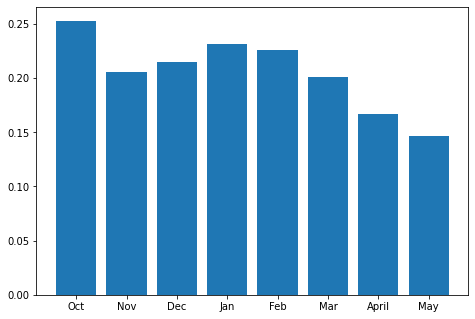

<Figure size 1440x1440 with 0 Axes>

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Months = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'April', 'May']
Bardata = plotdata.iloc[0,]
ax.bar(Months,Bardata)
plt.figure(figsize=(20,20))
plt.show()

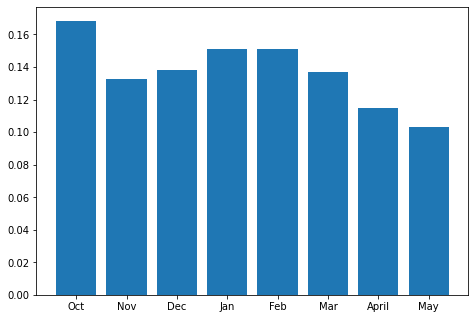

<Figure size 1440x1440 with 0 Axes>

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Months = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'April', 'May']
Bardata = plotdata2.iloc[0,]
ax.bar(Months,Bardata)
plt.figure(figsize=(20,20))
plt.show()



```
# This is formatted as code
```

#SIF

In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
pip install wheel


In [ ]:
pip install pyshp

     |████████████████████████████████| 225kB 11.6MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=f8c5b2c594cceee9215ebc92d5e3378c4dfce04d5786d6035dfc89aa4eeac125
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built pyshp


In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip


Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
     \ 151.4MB 145.4MB/s
     |████████████████████████████████| 6.5MB 9.6MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759570 sha256=fdbe1b8dfcc29985f9f4136b0c7c1fd17ce8560a23f2b3784baa7986eff9facc
  Stored in directory: /tmp/pip-ephem-wheel-cache-eotygrpr/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536

In [ ]:
!pip install pyproj==1.9.6

     |████████████████████████████████| 2.8MB 9.4MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp37-cp37m-linux_x86_64.whl size=3702421 sha256=1a91b7af3ea52125f05d04adf35a895b6e84e2c4c54d71a6820dd439dbf81e10
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 3.0.1
    Uninstalling pyproj-3.0.1:
      Successfully uninstalled pyproj-3.0.1


In [ ]:
!pip install geopandas
import geopandas

     |████████████████████████████████| 1.0MB 10.4MB/s 
     |████████████████████████████████| 15.3MB 338kB/s 
  Using cached https://files.pythonhosted.org/packages/b1/72/d52e9ca81caef056062d71991b0e9b1d16af042245627c5d0e4916a36c4f/pyproj-3.0.1-cp37-cp37m-manylinux2010_x86_64.whl
  Found existing installation: pyproj 1.9.6
    Uninstalling pyproj-1.9.6:
      Successfully uninstalled pyproj-1.9.6


In [ ]:
!pip install netCDF4

     |████████████████████████████████| 4.7MB 13.4MB/s 
     |████████████████████████████████| 317kB 57.7MB/s 


In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
pip install https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz

     - 214.5MB 9.0MB/s
  ERROR: Failed building wheel for basemap
  Running setup.py clean for basemap
Failed to build basemap
  Found existing installation: basemap 1.2.2+dev
    Uninstalling basemap-1.2.2+dev:
      Successfully uninstalled basemap-1.2.2+dev
    Running setup.py install for basemap ... error
  Rolling back uninstall of basemap
  Moving to /usr/local/lib/python3.7/dist-packages/_geoslib.cpython-37m-x86_64-linux-gnu.so
   from /tmp/pip-uninstall-ea935evf/_geoslib.cpython-37m-x86_64-linux-gnu.so
  Moving to /usr/local/lib/python3.7/dist-packages/basemap-1.2.2+dev-py3.7-nspkg.pth
   from /tmp/pip-uninstall-ea935evf/basemap-1.2.2+dev-py3.7-nspkg.pth
  Moving to /usr/local/lib/python3.7/dist-packages/basemap-1.2.2+dev.dist-info/
   from /usr/local/lib/python3.7/dist-packages/~asemap-1.2.2+dev.dist-info
  Moving to /usr/local/lib/python3.7/dist-packages/mpl_toolkits/basemap/
   from /usr/local/lib/python3.7/dist-packages/mpl_toolkits/~asemap
  Moving to /usr/local/lib/pytho

In [ ]:
from netCDF4 import Dataset
import numpy as np


In [ ]:

import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
sns.set(style='whitegrid', palette='pastel', color_codes=True) 
sns.mpl.rc('figure', figsize=(10,6))


In [ ]:
shp_path = '/content/MyDrive/MyDrive/ShapeFile/District_Boundary.shp'
#reading the shape file by using reader function of the shape lib
sf = shp.Reader(shp_path)
print(sf)

shapefile Reader
    33 shapes (type 'POLYGON')
    33 records (6 fields)


In [ ]:
nc_file = '/content/MyDrive/MyDrive/SIF005_201808.nc'
fh = Dataset(nc_file,mode='r')
fh

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): lon(7200), lat(3600)
    variables(dimensions): float64 lon(lon), float64 lat(lat), float32 SIF_740_daily_corr(lat, lon), float32 SIF_740_daily_corr_SD(lat, lon), int32 EVI_Quality(lat, lon)
    groups: 

In [ ]:
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]
SIF = fh.variables['SIF_740_daily_corr'][:]
print(lons)
print(lats)
print(SIF)
SIF_units = fh.variables['SIF_740_daily_corr'].units

[-179.975 -179.925 -179.875 ...  179.875  179.925  179.975]
[ 89.975  89.925  89.875 ... -89.875 -89.925 -89.975]
[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]


In [ ]:
SIF_data = SIF

SIF_DF = geopandas.GeoDataFrame(SIF_data)
SIF_DF

0     1     2     3     4     5     ...  7194  7195  7196  7197  7198  7199
0      NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
1      NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
2      NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
3      NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
4      NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
...    ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
3595   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
3596   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
3597   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
3598   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
3599   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN

[3600 rows x 7200 columns]

In [ ]:
SIF_DF
mean = SIF_DF.mean()
mean

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
7195    0.182908
7196    0.179385
7197    0.179204
7198    0.179838
7199    0.180235
Length: 7200, dtype: float32

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


In [ ]:
# Get some parameters for the Stereographic Projection
#lon_0 = lons.mean()
#lat_0 = lats.mean()
lon_0=79
lat_0=24

m = Basemap(width=4000000,height=3500000,
            resolution='l',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)

In [ ]:
# Get some parameters for the Stereographic Projection
#lon_0 = lons.mean()
#lat_0 = lats.mean()
lon_0=79
lat_0=24

m = Basemap(width=4000000,height=3500000,
            resolution='l',projection='cyl',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)

In [ ]:
# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)
m

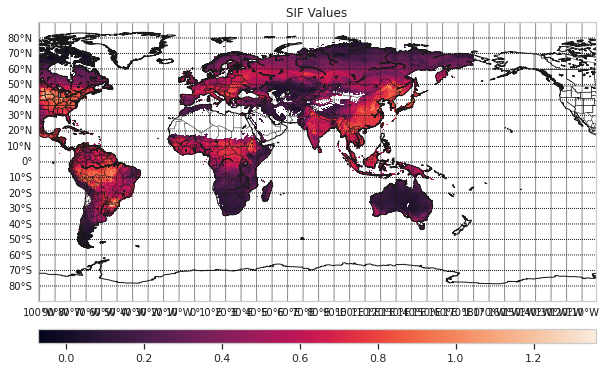

In [ ]:
# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(SIF))

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
#cbar.set_label(tmax_units)

# Add Title
plt.title('SIF Values')

plt.show()

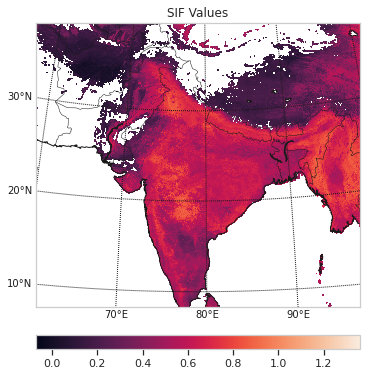

In [ ]:
# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(SIF))

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
#cbar.set_label(tmax_units)

# Add Title
plt.title('SIF Values')

plt.show()

# Rainfall


In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
rf = pd.read_excel('/content/MyDrive/MyDrive/Rainfall_1997_to_2019.xlsx')
rf


State District  Year  ...   November  December  Annual Total
0    Rajasthan    Ajmer  1997  ...  53.270000  6.612000    685.217000
1    Rajasthan    Ajmer  1998  ...   7.943000  0.000000    612.442000
2    Rajasthan    Ajmer  1999  ...   0.039000  0.000000    500.932000
3    Rajasthan    Ajmer  2000  ...   3.826000  0.000000    415.871000
4    Rajasthan    Ajmer  2001  ...   0.370000  0.000000    573.769000
..         ...      ...   ...  ...        ...       ...           ...
728  Rajasthan     Раli  2015  ...   0.000000  0.000000    541.400000
729  Rajasthan     Раli  2016  ...   0.000000  0.000000    916.700000
730  Rajasthan     Раli  2017  ...   0.000000  0.600000    786.100000
731  Rajasthan     Раli  2018  ...   7.019789  1.080744    520.807139
732  Rajasthan     Раli  2019  ...   7.019789  1.080744    520.807139

[733 rows x 16 columns]

In [ ]:
mrf = rf.sort_values(by=['Year'])
aggregation_functions = {'January': 'mean', 'February': 'mean','March': 'mean','April': 'mean','May': 'mean','June': 'mean','July': 'mean','August': 'mean','September': 'mean','October': 'mean','November': 'mean','December': 'mean'}
mrf= mrf.groupby(mrf['Year']).aggregate(aggregation_functions)

mrf=mrf.mean(axis=1)
mrf

Year
1997    56.958906
1998    54.543776
1999    44.906190
2000    37.809430
2001    45.907669
2002    20.676182
2003    48.679591
2004    41.511458
2005    43.397656
2006    50.427344
2007    40.602344
2008    44.523698
2009    31.496094
2010    54.477865
2011    58.005729
2012    50.681183
2013    59.915054
2014    48.568548
2015    44.641927
2016    70.981771
2017    59.803906
2018    49.120235
2019    49.120235
dtype: float64

In [ ]:

type(mrf)

pandas.core.groupby.generic.DataFrameGroupBy

# IMPLEMENTING ML


In [ ]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Install plotlyExpress
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv("/content/MyDrive/MyDrive/DATAFRAME_NDVIEVI.csv")
df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df = pd.read_csv("/content/DATAFRAME_NDVIEVI - DATAFRAME_NDVIEVI.csv")
df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df

year      nOct      nNov  ...        Yield       LAI   Rainfall
0   2000  0.253092  0.205477  ...  2778.000000  0.291067  37.809430
1   2001  0.252050  0.220225  ...  2708.000000  0.291067  45.907669
2   2002  0.200088  0.178285  ...  2762.000000  0.291067  20.676182
3   2003  0.299165  0.242215  ...  2610.000000  0.370912  48.679591
4   2004  0.267995  0.233797  ...  2713.000000  0.407855  41.511458
5   2005  0.296144  0.238595  ...  2602.000000  0.425636  43.397656
6   2006  0.270448  0.241070  ...  2619.000000  0.406170  50.427344
7   2007  0.288058  0.232087  ...  2708.000000  0.424946  40.602344
8   2008  0.269548  0.241286  ...  2802.000000  0.423478  44.523698
9   2009  0.241485  0.217261  ...  2907.000000  0.382237  31.496094
10  2010  0.347760  0.281049  ...  2839.000000  0.436381  54.477865
11  2011  0.358902  0.285063  ...  2988.000000  0.533877  58.005729
12  2012  0.367665  0.272726  ...  3177.000000  0.493898  50.681183
13  2013  0.362341  0.294062  ...  3117.000000  0.533015  59.915054
14  2014  0.328845  0.269318  ...  3146.000000  0.540132  48.568548
15  2015  0.306281  0.261867  ...  2750.000000  0.494748  44.641927
16  2016  0.340430  0.278652  ...  3034.000000  0.503689  70.981771
17  2017  0.295351  0.258309  ...  3200.000000  0.506958  59.803906
18  2018  0.331234  0.262935  ...  3371.000000  0.495558  49.120235
19  2019  0.384006  0.304001  ...  2891.833333  0.549670  49.120235

[20 rows x 24 columns]

In [ ]:
y = df['Yield']
df = df.drop(['Yield'], axis=1)

In [ ]:
y

0     2778.000000
1     2708.000000
2     2762.000000
3     2610.000000
4     2713.000000
5     2602.000000
6     2619.000000
7     2708.000000
8     2802.000000
9     2907.000000
10    2839.000000
11    2988.000000
12    3177.000000
13    3117.000000
14    3146.000000
15    2750.000000
16    3034.000000
17    3200.000000
18    3371.000000
19    2891.833333
Name: Yield, dtype: float64

In [ ]:
y.mean()

2886.14166665

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)


(15, 23)
(5, 23)


In [ ]:
X_train

year      nOct      nNov      nDec  ...   Area  Production       LAI   Rainfall
17  2017  0.295351  0.258309  0.286336  ...  30.79       98.51  0.506958  59.803906
6   2006  0.270448  0.241070  0.257106  ...  26.48       69.35  0.406170  50.427344
13  2013  0.362341  0.294062  0.307282  ...  30.00       93.51  0.533015  59.915054
4   2004  0.267995  0.233797  0.252087  ...  26.59       72.16  0.407855  41.511458
2   2002  0.200088  0.178285  0.187111  ...  26.34       72.77  0.291067  20.676182
5   2005  0.296144  0.238595  0.244888  ...  26.38       68.64  0.425636  43.397656
14  2014  0.328845  0.269318  0.282557  ...  30.47       95.85  0.540132  48.568548
9   2009  0.241485  0.217261  0.240780  ...  27.75       80.68  0.382237  31.496094
7   2007  0.288058  0.232087  0.246437  ...  27.99       75.81  0.424946  40.602344
16  2016  0.340430  0.278652  0.301451  ...  30.42       92.29  0.503689  70.981771
11  2011  0.358902  0.285063  0.291292  ...  29.07       86.87  0.533877  58.005729
3   2003  0.299165  0.242215  0.252126  ...  25.20       65.76  0.370912  48.679591
0   2000  0.253092  0.205477  0.214600  ...  27.49       76.37  0.291067  37.809430
15  2015  0.306281  0.261867  0.279289  ...  31.47       86.53  0.494748  44.641927
12  2012  0.367665  0.272726  0.281012  ...  29.86       94.88  0.493898  50.681183

[15 rows x 23 columns]

In [ ]:
X_test

year      nOct      nNov  ...  Production       LAI   Rainfall
18  2018  0.331234  0.262935  ...   99.700000  0.495558  49.120235
1   2001  0.252050  0.220225  ...   69.680000  0.291067  45.907669
19  2019  0.384006  0.304001  ...   82.353333  0.549670  49.120235
8   2008  0.269548  0.241286  ...   78.570000  0.423478  44.523698
10  2010  0.347760  0.281049  ...   80.800000  0.436381  54.477865

[5 rows x 23 columns]

In [ ]:
y_train

17    3200.0
6     2619.0
13    3117.0
4     2713.0
2     2762.0
5     2602.0
14    3146.0
9     2907.0
7     2708.0
16    3034.0
11    2988.0
3     2610.0
0     2778.0
15    2750.0
12    3177.0
Name: Yield, dtype: float64

In [ ]:
y_test

18    3371.000000
1     2708.000000
19    2891.833333
8     2802.000000
10    2839.000000
Name: Yield, dtype: float64

Decision Tree

In [ ]:
dtree1 = DecisionTreeRegressor()
dtree1.fit(X_train, y_train)

# Predict on training data
tr1 = dtree1.predict(X_train)

# Predict on testing data
y1 = dtree1.predict(X_test)

In [ ]:
tr1

array([3200., 2619., 3117., 2713., 2762., 2602., 3146., 2907., 2708.,
       3034., 2988., 2610., 2778., 2750., 3177.])

In [ ]:
y1

array([3200., 2602., 2988., 2713., 3034.])

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,tr1))) 
print('R squared via prediction on training set: ', r2_score(y_train, tr1))

# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,y1))) 
print('R squared via prediction on test set: ', r2_score(y_test, y1))

RMSE via prediction on training set:  0.0
R squared via prediction on training set:  1.0
RMSE via prediction on test set:  138.32644565800777
R squared via prediction on test set:  0.6451310237243668


In [ ]:
r2 = []
for i in range(1, 20):
  dtree = DecisionTreeRegressor(max_depth=i, random_state=0)
  dtree1.fit(X_train, y_train)
  y1 = dtree1.predict(X_test)
  r2.append(r2_score(y_test, y1))
for i in range(19):
  if r2[i] == max(r2):
    print(i, max(r2))

18 0.7761458920055622


In [ ]:
X_train['Yield'] = y_train
X_train['Predicted Yield'] = tr1
X_train = X_train.sort_values('Yield')
X_train = X_train.reset_index()

X_test['Yield'] = y_test
X_test['Predicted Yield'] = y1
X_test = X_test.sort_values('Yield')
X_test = X_test.reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

Visualization of actual yield to predicted yield on our training set

In [ ]:
fig = go.Figure()
fig.add_trace(go.Line(x=X_train.index, y=X_train['Yield'], name = 'Actual'))
fig.add_trace(go.Line(x=X_train.index, y=X_train['Predicted Yield'], name='Predicted'))
fig.update_xaxes(title_text='Index')
fig.update_yaxes(title_text='Yield')

fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
fig = go.Figure()
fig.add_trace(go.Line(x=X_test.index, y=X_test['Yield'], name='Actual'))
fig.add_trace(go.Line(x=X_test.index, y=X_test['Predicted Yield'], name='Predicted'))
fig.update_xaxes(title_text='Index')
fig.update_yaxes(title_text='Yield')

fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Random Forest Regression Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(15, 23)
(5, 23)


In [ ]:
r2_train = []
r2_test = []
for i in range(100, 401):
  model_rf = RandomForestRegressor(n_estimators=i, oob_score=True, random_state=100)
  model_rf.fit(X_train, y_train) 
  pred_train_rf = model_rf.predict(X_train)
  r2_train.append(r2_score(y_train, pred_train_rf)) 

  pred_test_rf = model_rf.predict(X_test)
  r2_test.append(r2_score(y_test, pred_test_rf))

for i in range(300):
  if r2_train[i] == max(r2_train):
    print('Row with max train r2: ', i+100)
  elif r2_test[i] == max(r2_test):
    print('Row with max test r2: ', i+100)

Row with max test r2:  143
Row with max train r2:  225


In [ ]:
model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
model_rf.fit(X_train, y_train) 
pred_train_rf= model_rf.predict(X_train)
print('RMSE via prediction on training set: ',np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print('R squared via prediction on training set: ',r2_score(y_train, pred_train_rf))

pred_test_rf = model_rf.predict(X_test)
print('RMSE via prediction on test set: ',np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print('R squared via prediction on test set: ',r2_score(y_test, pred_test_rf))

RMSE via prediction on training set:  45.65522033093989
R squared via prediction on training set:  0.9533427690484524
RMSE via prediction on test set:  194.74092808142655
R squared via prediction on test set:  0.29664906524443224


In [ ]:
pred_train_rf

array([3106.076, 2636.428, 3094.706, 2709.126, 2753.276, 2633.386,
       3128.71 , 2845.714, 2718.576, 3056.838, 3015.822, 2620.26 ,
       2768.99 , 2864.272, 3133.868])

In [ ]:
X_train['Yield'] = y_train
X_train['Predicted Yield'] = pred_train_rf
X_train = X_train.sort_values('Yield')
X_train = X_train.reset_index()

X_test['Yield'] = y_test
X_test['Predicted Yield'] = pred_test_rf
X_test = X_test.sort_values('Yield')
X_test = X_test.reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
fig = go.Figure()
fig.add_trace(go.Line(x=X_train.index, y=X_train['Yield'], name = 'Actual'))
fig.add_trace(go.Line(x=X_train.index, y=X_train['Predicted Yield'], name='Predicted'))
fig.update_xaxes(title_text='Index')
fig.update_yaxes(title_text='Yield')

fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
fig = go.Figure()
fig.add_trace(go.Line(x=X_train.index, y=X_test['Yield'], name = 'Actual'))
fig.add_trace(go.Line(x=X_train.index, y=X_test['Predicted Yield'], name='Predicted'))
fig.update_xaxes(title_text='Index')
fig.update_yaxes(title_text='Yield')

fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




# New Section

In [ ]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Install plotlyExpress
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/sudislife/DatasetsForColab/main/ndvi%20and%20evi.csv')

In [ ]:
df

Unnamed: 0      nOct      nNov  ...    Area  Production   Yield
0            0  0.253092  0.205477  ...  27.490      99.105  2778.0
1            1  0.252050  0.220225  ...  25.730      99.105  2708.0
2            2  0.200088  0.178285  ...  26.340      99.105  2762.0
3            3  0.299165  0.242215  ...  25.200      99.105  2610.0
4            4  0.267995  0.233797  ...  26.590      99.105  2713.0
5            5  0.296144  0.238595  ...  26.380      99.105  2602.0
6            6  0.270448  0.241070  ...  26.480      99.105  2619.0
7            7  0.288058  0.232087  ...  27.990      99.105  2708.0
8            8  0.269548  0.241286  ...  28.040      99.105  2802.0
9            9  0.241485  0.217261  ...  27.750      99.105  2907.0
10          10  0.347760  0.281049  ...  28.460      99.105  2839.0
11          11  0.358902  0.285063  ...  29.070      99.105  2988.0
12          12  0.367665  0.272726  ...  29.860      99.105  3177.0
13          13  0.362341  0.294062  ...  30.000      99.105  3117.0
14          14  0.328845  0.269318  ...  30.470      99.105  3146.0
15          15  0.306281  0.261867  ...  31.470      99.105  2750.0
16          16  0.340430  0.278652  ...  30.420      99.105  3034.0
17          17  0.295351  0.258309  ...  30.790      99.105  3200.0
18          18  0.331234  0.262935  ...  29.580      99.105  3371.0
19          19  0.384006  0.304001  ...  30.605      99.105  3285.5

[20 rows x 20 columns]

In [ ]:
df0=df

In [ ]:
df0.drop(df0.index, inplace=True)

In [ ]:
df0

Empty DataFrame
Columns: [Unnamed: 0, nOct, nNov, nDec, nJan, nFeb, nMar, nApr, nMay, eOct, eNov, eDec, eJan, eFeb, eMar, eApr, eMay, Area, Production, Yield]
Index: []

In [ ]:
j=0
for i in range(18):
  print(i)
  df0=df0.append(df.iloc[i,:])
  df0=df0.append(pd.Series(), ignore_index=True)


0


IndexError: ignored

In [ ]:
df0.iloc[0,:]

Unnamed: 0       0.000000
year          2000.000000
nOct             0.253092
nNov             0.205477
nDec             0.214600
nJan             0.231618
nFeb             0.225767
nMar             0.201072
nApr             0.166901
nMay             0.146278
nMean            0.205601
eOct             0.168545
eNov             0.132783
eDec             0.138434
eJan             0.150869
eFeb             0.151159
eMar             0.137191
eApr             0.114986
eMay             0.102854
eMean            0.137103
Area            27.490000
Production      76.370000
Yield         2778.000000
LAI              0.291067
Rainfall        37.809430
Name: 0, dtype: float64

In [ ]:
df0

Unnamed: 0    year      nOct  ...   Yield       LAI   Rainfall
0          0.0  2000.0  0.253092  ...  2778.0  0.291067  37.809430
1          NaN     NaN       NaN  ...     NaN       NaN        NaN
2          1.0  2001.0  0.252050  ...  2708.0  0.291067  45.907669
3          NaN     NaN       NaN  ...     NaN       NaN        NaN
4          2.0  2002.0  0.200088  ...  2762.0  0.291067  20.676182
5          NaN     NaN       NaN  ...     NaN       NaN        NaN
6          3.0  2003.0  0.299165  ...  2610.0  0.370912  48.679591
7          NaN     NaN       NaN  ...     NaN       NaN        NaN
8          4.0  2004.0  0.267995  ...  2713.0  0.407855  41.511458
9          NaN     NaN       NaN  ...     NaN       NaN        NaN
10         5.0  2005.0  0.296144  ...  2602.0  0.425636  43.397656
11         NaN     NaN       NaN  ...     NaN       NaN        NaN
12         6.0  2006.0  0.270448  ...  2619.0  0.406170  50.427344
13         NaN     NaN       NaN  ...     NaN       NaN        NaN
14         7.0  2007.0  0.288058  ...  2708.0  0.424946  40.602344
15         NaN     NaN       NaN  ...     NaN       NaN        NaN
16         8.0  2008.0  0.269548  ...  2802.0  0.423478  44.523698
17         NaN     NaN       NaN  ...     NaN       NaN        NaN
18         9.0  2009.0  0.241485  ...  2907.0  0.382237  31.496094
19         NaN     NaN       NaN  ...     NaN       NaN        NaN
20        10.0  2010.0  0.347760  ...  2839.0  0.436381  54.477865
21         NaN     NaN       NaN  ...     NaN       NaN        NaN
22        11.0  2011.0  0.358902  ...  2988.0  0.533877  58.005729
23         NaN     NaN       NaN  ...     NaN       NaN        NaN
24        12.0  2012.0  0.367665  ...  3177.0  0.493898  50.681183
25         NaN     NaN       NaN  ...     NaN       NaN        NaN
26        13.0  2013.0  0.362341  ...  3117.0  0.533015  59.915054
27         NaN     NaN       NaN  ...     NaN       NaN        NaN
28        14.0  2014.0  0.328845  ...  3146.0  0.540132  48.568548
29         NaN     NaN       NaN  ...     NaN       NaN        NaN
30        15.0  2015.0  0.306281  ...  2750.0  0.494748  44.641927
31         NaN     NaN       NaN  ...     NaN       NaN        NaN
32        16.0  2016.0  0.340430  ...  3034.0  0.503689  70.981771
33         NaN     NaN       NaN  ...     NaN       NaN        NaN
34        17.0  2017.0  0.295351  ...  3200.0  0.506958  59.803906
35         NaN     NaN       NaN  ...     NaN       NaN        NaN
36        18.0  2018.0  0.331234  ...  3371.0  0.495558  49.120235
37         NaN     NaN       NaN  ...     NaN       NaN        NaN

[38 rows x 25 columns]

In [ ]:
df0.interpolate()

Unnamed: 0    year      nOct  ...   Yield       LAI   Rainfall
0          0.0  2000.0  0.253092  ...  2778.0  0.291067  37.809430
1          0.5  2000.5  0.252571  ...  2743.0  0.291067  41.858549
2          1.0  2001.0  0.252050  ...  2708.0  0.291067  45.907669
3          1.5  2001.5  0.226069  ...  2735.0  0.291067  33.291925
4          2.0  2002.0  0.200088  ...  2762.0  0.291067  20.676182
5          2.5  2002.5  0.249627  ...  2686.0  0.330989  34.677886
6          3.0  2003.0  0.299165  ...  2610.0  0.370912  48.679591
7          3.5  2003.5  0.283580  ...  2661.5  0.389383  45.095524
8          4.0  2004.0  0.267995  ...  2713.0  0.407855  41.511458
9          4.5  2004.5  0.282070  ...  2657.5  0.416745  42.454557
10         5.0  2005.0  0.296144  ...  2602.0  0.425636  43.397656
11         5.5  2005.5  0.283296  ...  2610.5  0.415903  46.912500
12         6.0  2006.0  0.270448  ...  2619.0  0.406170  50.427344
13         6.5  2006.5  0.279253  ...  2663.5  0.415558  45.514844
14         7.0  2007.0  0.288058  ...  2708.0  0.424946  40.602344
15         7.5  2007.5  0.278803  ...  2755.0  0.424212  42.563021
16         8.0  2008.0  0.269548  ...  2802.0  0.423478  44.523698
17         8.5  2008.5  0.255516  ...  2854.5  0.402857  38.009896
18         9.0  2009.0  0.241485  ...  2907.0  0.382237  31.496094
19         9.5  2009.5  0.294622  ...  2873.0  0.409309  42.986980
20        10.0  2010.0  0.347760  ...  2839.0  0.436381  54.477865
21        10.5  2010.5  0.353331  ...  2913.5  0.485129  56.241797
22        11.0  2011.0  0.358902  ...  2988.0  0.533877  58.005729
23        11.5  2011.5  0.363284  ...  3082.5  0.513888  54.343456
24        12.0  2012.0  0.367665  ...  3177.0  0.493898  50.681183
25        12.5  2012.5  0.365003  ...  3147.0  0.513456  55.298119
26        13.0  2013.0  0.362341  ...  3117.0  0.533015  59.915054
27        13.5  2013.5  0.345593  ...  3131.5  0.536574  54.241801
28        14.0  2014.0  0.328845  ...  3146.0  0.540132  48.568548
29        14.5  2014.5  0.317563  ...  2948.0  0.517440  46.605238
30        15.0  2015.0  0.306281  ...  2750.0  0.494748  44.641927
31        15.5  2015.5  0.323355  ...  2892.0  0.499219  57.811849
32        16.0  2016.0  0.340430  ...  3034.0  0.503689  70.981771
33        16.5  2016.5  0.317891  ...  3117.0  0.505324  65.392838
34        17.0  2017.0  0.295351  ...  3200.0  0.506958  59.803906
35        17.5  2017.5  0.313293  ...  3285.5  0.501258  54.462071
36        18.0  2018.0  0.331234  ...  3371.0  0.495558  49.120235
37        18.0  2018.0  0.331234  ...  3371.0  0.495558  49.120235

[38 rows x 25 columns]

# New Section

In [ ]:
from google.colab import drive
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/sudislife/DatasetsForColab/main/ndvi%20and%20evi.csv')

In [ ]:
df

Unnamed: 0      nOct      nNov  ...    Area  Production   Yield
0            0  0.253092  0.205477  ...  27.490      99.105  2778.0
1            1  0.252050  0.220225  ...  25.730      99.105  2708.0
2            2  0.200088  0.178285  ...  26.340      99.105  2762.0
3            3  0.299165  0.242215  ...  25.200      99.105  2610.0
4            4  0.267995  0.233797  ...  26.590      99.105  2713.0
5            5  0.296144  0.238595  ...  26.380      99.105  2602.0
6            6  0.270448  0.241070  ...  26.480      99.105  2619.0
7            7  0.288058  0.232087  ...  27.990      99.105  2708.0
8            8  0.269548  0.241286  ...  28.040      99.105  2802.0
9            9  0.241485  0.217261  ...  27.750      99.105  2907.0
10          10  0.347760  0.281049  ...  28.460      99.105  2839.0
11          11  0.358902  0.285063  ...  29.070      99.105  2988.0
12          12  0.367665  0.272726  ...  29.860      99.105  3177.0
13          13  0.362341  0.294062  ...  30.000      99.105  3117.0
14          14  0.328845  0.269318  ...  30.470      99.105  3146.0
15          15  0.306281  0.261867  ...  31.470      99.105  2750.0
16          16  0.340430  0.278652  ...  30.420      99.105  3034.0
17          17  0.295351  0.258309  ...  30.790      99.105  3200.0
18          18  0.331234  0.262935  ...  29.580      99.105  3371.0
19          19  0.384006  0.304001  ...  30.605      99.105  3285.5

[20 rows x 20 columns]

In [ ]:
dfndvi=df

In [ ]:
dfndvi.drop(['Unnamed: 0','eOct','eNov','eDec','eJan','eFeb','eMar','eApr','eMay','Production'], axis=1, inplace=True)

In [ ]:
dfndvi

nOct      nNov      nDec      nJan  ...      nApr      nMay    Area   Yield
0   0.253092  0.205477  0.214600  0.231618  ...  0.166901  0.146278  27.490  2778.0
1   0.252050  0.220225  0.227810  0.250651  ...  0.169408  0.146951  25.730  2708.0
2   0.200088  0.178285  0.187111  0.206101  ...  0.161110  0.138828  26.340  2762.0
3   0.299165  0.242215  0.252126  0.266660  ...  0.168698  0.159793  25.200  2610.0
4   0.267995  0.233797  0.252087  0.263573  ...  0.164787  0.154184  26.590  2713.0
5   0.296144  0.238595  0.244888  0.255162  ...  0.164522  0.147785  26.380  2602.0
6   0.270448  0.241070  0.257106  0.272435  ...  0.185652  0.162515  26.480  2619.0
7   0.288058  0.232087  0.246437  0.260172  ...  0.173423  0.158299  27.990  2708.0
8   0.269548  0.241286  0.261694  0.272596  ...  0.166817  0.151305  28.040  2802.0
9   0.241485  0.217261  0.240780  0.258629  ...  0.155143  0.143591  27.750  2907.0
10  0.347760  0.281049  0.289971  0.311160  ...  0.195418  0.170374  28.460  2839.0
11  0.358902  0.285063  0.291292  0.301731  ...  0.199267  0.179268  29.070  2988.0
12  0.367665  0.272726  0.281012  0.296440  ...  0.207535  0.176050  29.860  3177.0
13  0.362341  0.294062  0.307282  0.325629  ...  0.210732  0.184954  30.000  3117.0
14  0.328845  0.269318  0.282557  0.309647  ...  0.216663  0.183002  30.470  3146.0
15  0.306281  0.261867  0.279289  0.302397  ...  0.190549  0.169614  31.470  2750.0
16  0.340430  0.278652  0.301451  0.333207  ...  0.188890  0.178282  30.420  3034.0
17  0.295351  0.258309  0.286336  0.308514  ...  0.190961  0.172175  30.790  3200.0
18  0.331234  0.262935  0.282243  0.302006  ...  0.201050  0.173234  29.580  3371.0
19  0.384006  0.304001  0.321684  0.347627  ...  0.218669  0.187034  30.605  3285.5

[20 rows x 10 columns]